In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.manifold import TSNE
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
import pickle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.


## Loading Data

In [4]:
raw_data = pd.read_csv('data/creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Analysis

In [5]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Total 2,84,807 data points

In [6]:
raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Highly imbalanced data.

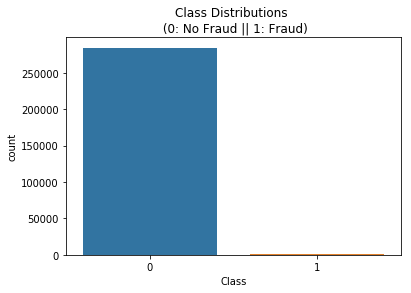

In [7]:
sns.countplot('Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

In [8]:
raw_data.isnull().values.any()

False

No Null Values in data. <b> Good </b> thing

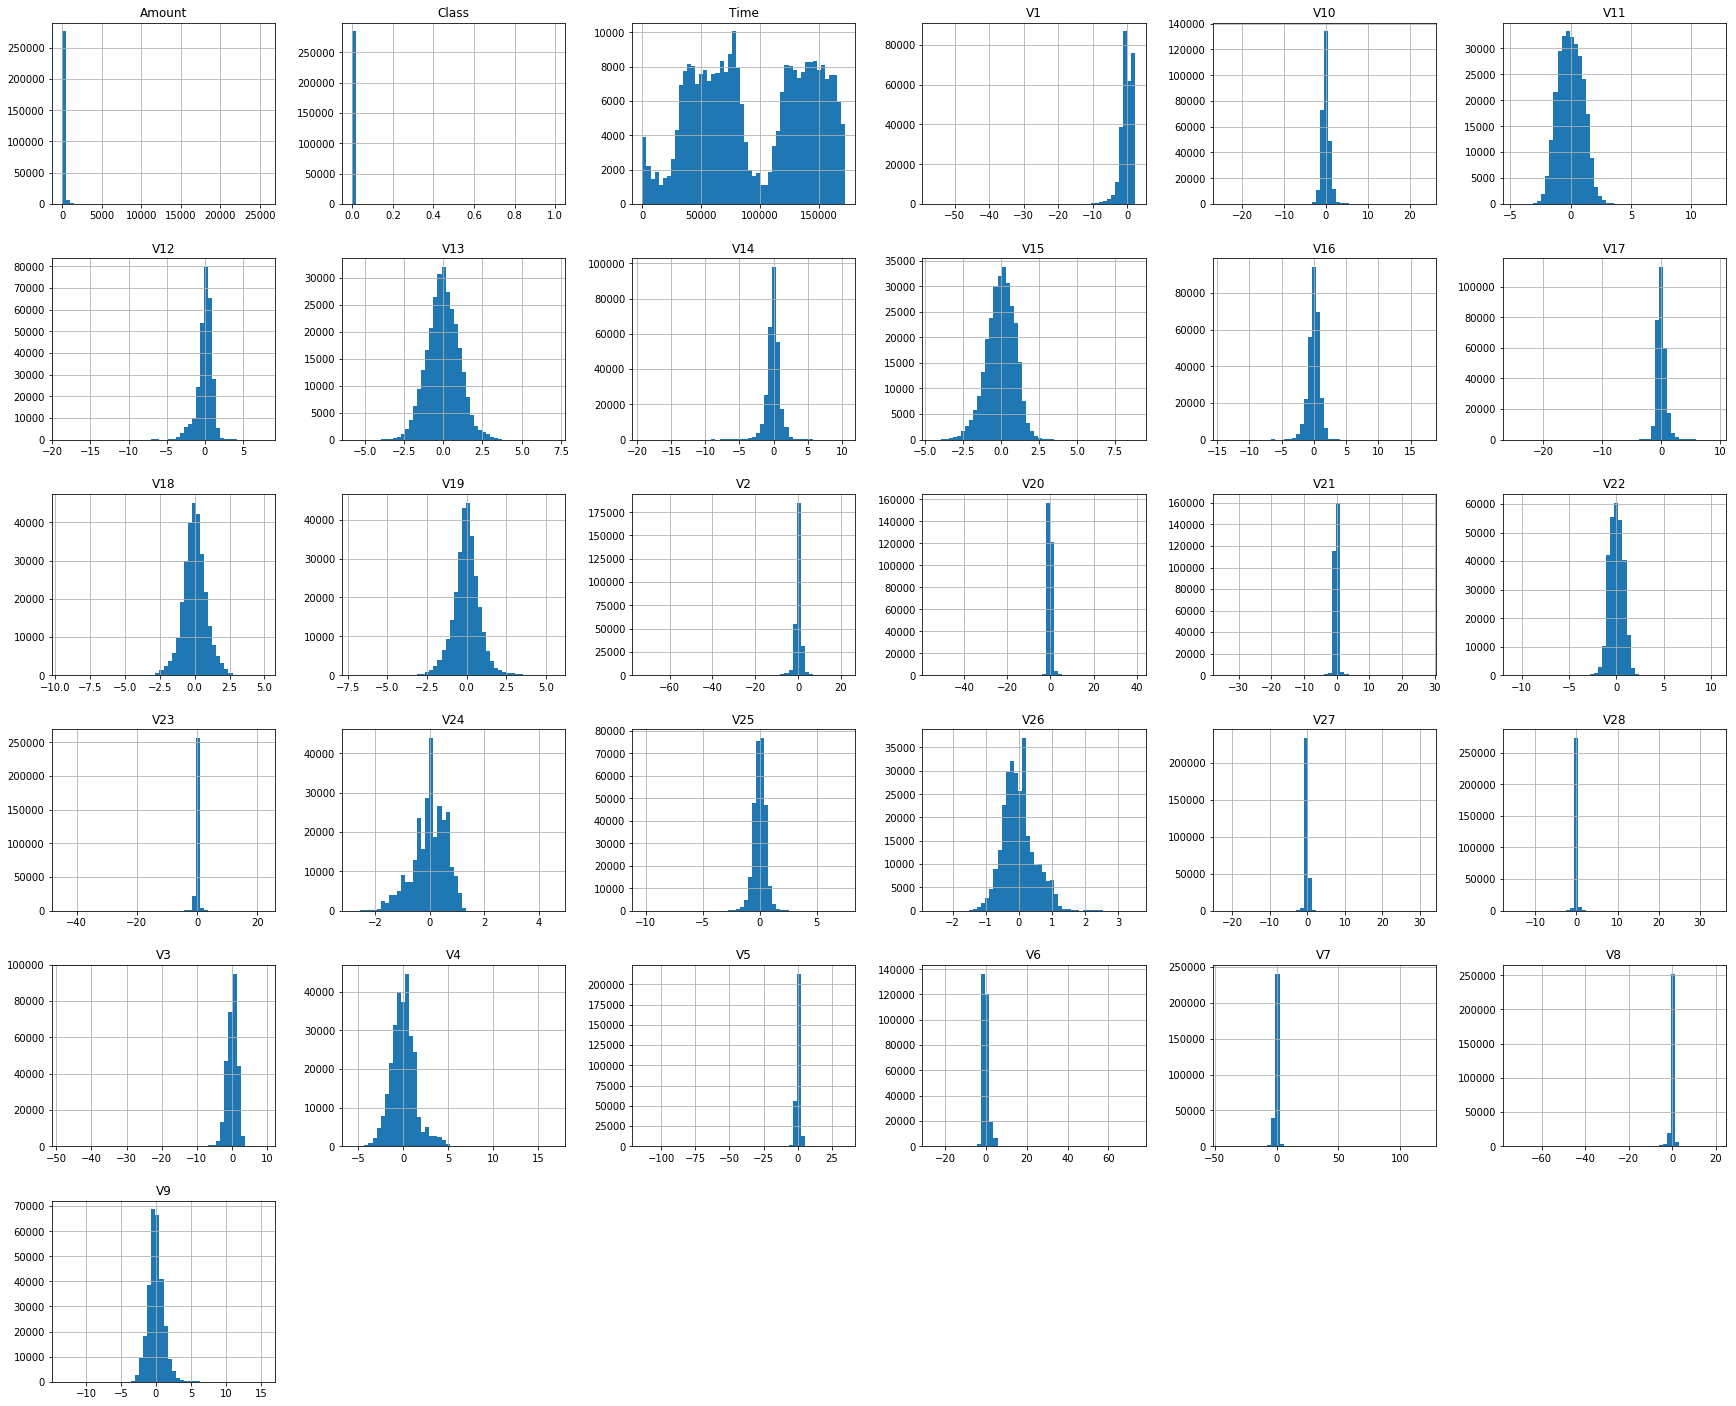

In [9]:
raw_data.hist(bins=50, figsize=(30, 25))
plt.show()

We cannnot get much idea about V1-V28 features

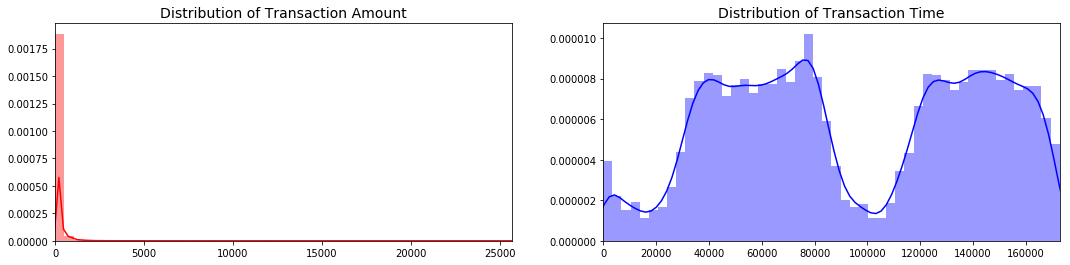

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = raw_data['Amount'].values
time_val = raw_data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Transaction amount is heavily skewed on right side. Most trasactions are of lower amount. This fact is also reflected in mean of Transaction Amount which is <b> 88.349619 </b> (As we have already seen in above cell)

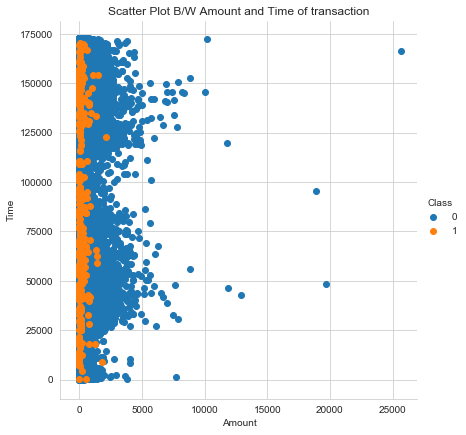

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(raw_data, hue="Class", size=6) \
   .map(plt.scatter, "Amount", "Time") \
   .add_legend();
plt.title('Scatter Plot B/W Amount and Time of transaction')
plt.show();

We can see that almost all frauds are commited for only small transaction amounts.

### Analysis for Fraud Class

We'll try to analyze all the points for 'Class = 1', i.e. <b> Fraud </b> class

In [12]:
data_for_fraud = raw_data.loc[raw_data['Class'] == 1];
data_for_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Mean transaction amount for frauds in <b> 122.211321 </b> and a maximum amount is of 2125.87

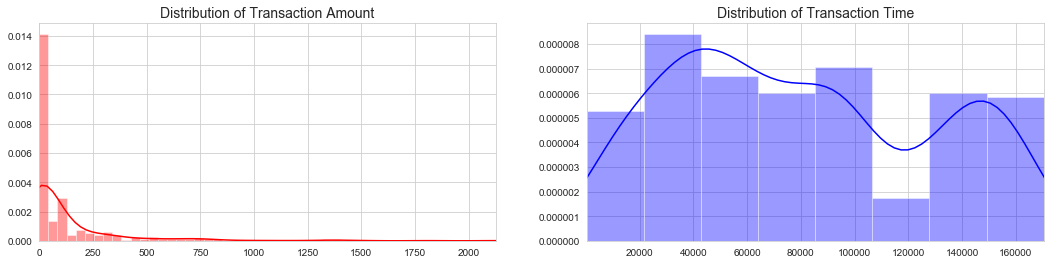

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data_for_fraud['Amount'].values
time_val = data_for_fraud['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

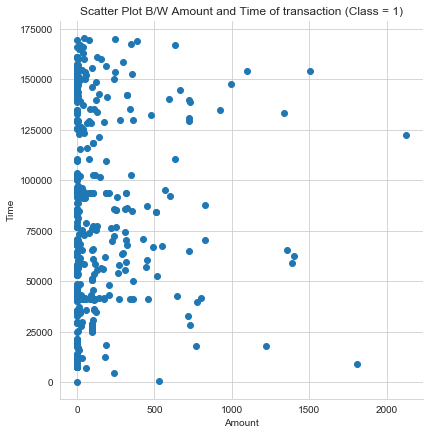

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(data_for_fraud, size=6) \
   .map(plt.scatter, "Amount", "Time") \
   .add_legend();
plt.title('Scatter Plot B/W Amount and Time of transaction (Class = 1)')
plt.show();

<b> We can see alot of data points for Amount = 0 and Class = 1, how can fraud be commmited for amount = 0? </b>

In [15]:
data_for_fraud.loc[data_for_fraud['Amount'] == 0].shape

(27, 31)

27 data points with Amount = 0 and Class = 1

### TSNE

In [16]:
lables = raw_data['Class'].values
print('Shape of raw data: {}'.format(raw_data.shape))
df = raw_data.drop('Class', axis=1)
print('Shape of raw data without lables: {}'.format(df.shape))

Shape of raw data: (284807, 31)
Shape of raw data without lables: (284807, 30)


In [15]:
# tsne_model = TSNE(n_components=2, perplexity = 10, n_iter = 5000)
# tsne_data = tsne_model.fit_transform(df)

In [16]:
# filehandler = open('tsne_dump.obj', 'wb') 
# pickle.dump(tsne_data, filehandler)

In [17]:
file = open('tsne_dump.obj', 'rb') 
tsne_data = pickle.load(file)

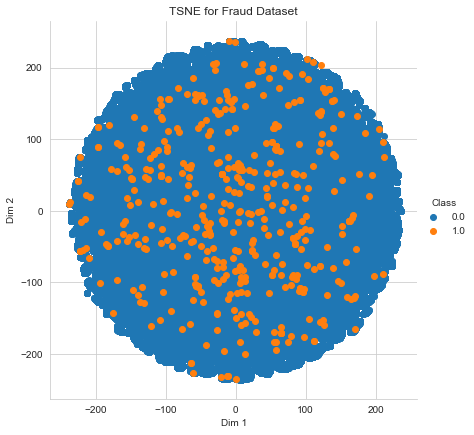

In [18]:
tsne_data = np.vstack((tsne_data.T, lables)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim 1", "Dim 2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=6).map(plt.scatter, 'Dim 1', 'Dim 2').add_legend()
plt.title("TSNE for Fraud Dataset")
plt.show()

We can see alot of overlap in points. No clear boundary can be visualized. We will analyze the performance of Logistic Regression (LR) and K-Nearest Neighbors (KNN). <br>
I concur that <b>KNN should better than LR for such a data </b>

## Model Training

In [19]:
# separating features from class
data_features = raw_data.loc[:, raw_data.columns != 'Class']
data_class = raw_data['Class']

# normalizing data
norm_data_features = StandardScaler().fit_transform(data_features)

# train-test data split
x_train, x_test, y_train, y_test = train_test_split(norm_data_features, data_class, stratify=data_class, test_size=0.35, 
                                                    random_state=1)

In [20]:
print('Numner of Training Data Points: {}'.format(len(x_train)))
print('Numner of Test Data Points: {}'.format(len(x_test)))

print('----------------------------------')

print('Training Data')
print(y_train.value_counts())

print('Test Data')
print(y_test.value_counts())

Numner of Training Data Points: 185124
Numner of Test Data Points: 99683
----------------------------------
Training Data
0    184804
1       320
Name: Class, dtype: int64
Test Data
0    99511
1      172
Name: Class, dtype: int64


A stratified split. <b> Good </b>

In [21]:
def printConfusionMatrix(test_lables, pred) :
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('True Negatives: {}'.format(tn))
    print('False Positives: {}'.format(fp))
    print('False Negatives: {}'.format(fn))
    print('True Positives: {}'.format(tp))
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_Score = (2*precision*recall) / (precision + recall)
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1-Score: {}'.format(F1_Score))

### Fitting a Linear Regression Model

In [22]:
# defining a simple LR model
lr_model = LogisticRegression()

In [23]:
lr_model.fit(x_train,y_train)

pred = lr_model.predict(x_test)
print('Accuracy: {}%'.format(lr_model.score(x_test, y_test)*100))

Accuracy: 99.92977739434006%


Exceptionally High Accuracy, this can be misleading

In [24]:
printConfusionMatrix(y_test, pred)

True Negatives: 99496
False Positives: 15
False Negatives: 55
True Positives: 117
Precision: 0.8863636363636364
Recall: 0.6802325581395349
F1-Score: 0.769736842105263


For a fairly simple Linear Regression model, F1-Score of 0.77 is very good. But we have a fairly high recall. Out of 172 class 1 data points, we missed 55 and classified them as class 0 which is not desirable.

### KNN

In [25]:
# defining a simple KNN model with K = 5
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [27]:
printConfusionMatrix(y_test, pred_knn)

True Negatives: 99503
False Positives: 8
False Negatives: 38
True Positives: 134
Precision: 0.9436619718309859
Recall: 0.7790697674418605
F1-Score: 0.8535031847133757


Better performance than simple LR

## Oversampling

### Naive random over-sampling

In [29]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

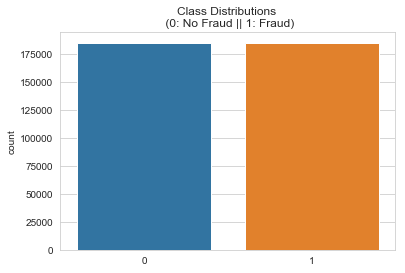

Numner of Training Data Points: 369608


In [37]:
sns.countplot(x=y_resampled)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled)))

We have oversampled the training data points. They have increased from 1,85,124 to 3,69,608. As we can also see, class distribution is also balanced

In [38]:
knn.fit(X_resampled, y_resampled)
pred_knn = knn.predict(x_test)

In [39]:
printConfusionMatrix(y_test, pred_knn)

True Negatives: 99431
False Positives: 80
False Negatives: 25
True Positives: 147
Precision: 0.6475770925110133
Recall: 0.8546511627906976
F1-Score: 0.7368421052631579


Random over sampling as decrased the performace of simple KNN. It is due to overfitting certain data points.

### SMOTE over-sampling

In [44]:
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(x_train, y_train)

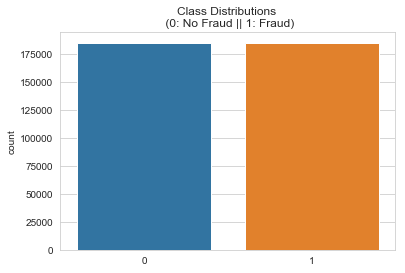

Numner of Training Data Points: 369608


In [45]:
sns.countplot(x=y_resampled_smote)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled_smote)))

In [46]:
knn.fit(X_resampled_smote, y_resampled_smote)
pred_knn = knn.predict(x_test)

In [47]:
printConfusionMatrix(y_test, pred_knn)

True Negatives: 99328
False Positives: 183
False Negatives: 23
True Positives: 149
Precision: 0.44879518072289154
Recall: 0.8662790697674418
F1-Score: 0.5912698412698412


SMOTE has two less false negatives which is good for us, every false negative matters for us. But it has done so at the expense of large increase in false positives due to which our F1 score has gone down.

#### SMOTE with Tomek Links

In [57]:
tl = TomekLinks()

In [59]:
X_resampled_smote_tomek, y_resampled_smote_tomek = tl.fit_resample(X_resampled_smote, y_resampled_smote)

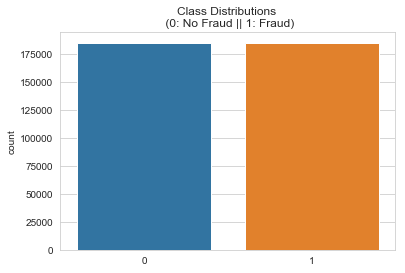

Numner of Training Data Points: 369608


In [61]:
sns.countplot(x=y_resampled_smote_tomek)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled_smote_tomek)))

After removing tomek links from the dataset created from SMOTE, we get same number of data points. No improvement

### ADASYN over-sampling

In [49]:
X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(x_train, y_train)

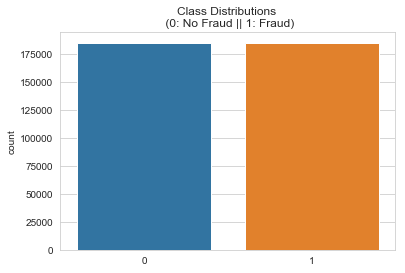

Numner of Training Data Points: 369604


In [50]:
sns.countplot(x=y_resampled_adasyn)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled_adasyn)))

In [51]:
knn.fit(X_resampled_adasyn, y_resampled_adasyn)
pred_knn = knn.predict(x_test)

In [52]:
printConfusionMatrix(y_test, pred_knn)

True Negatives: 99327
False Positives: 184
False Negatives: 23
True Positives: 149
Precision: 0.44744744744744747
Recall: 0.8662790697674418
F1-Score: 0.5900990099009901


ADASYN gives similar results as SMOTE

#### ADASYN with Tomek Links

In [63]:
X_resampled_adasyn_tomek, y_resampled_adasyn_tomek = tl.fit_resample(X_resampled_adasyn, y_resampled_adasyn)

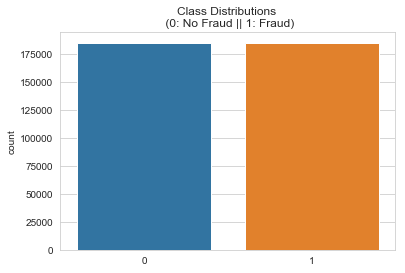

Numner of Training Data Points: 369604


In [64]:
sns.countplot(x=y_resampled_adasyn_tomek)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled_adasyn_tomek)))

After removing tomek links from the dataset created from ADASYN, we get same number of data points. No improvement

### Border Line over-sampling

In [53]:
 X_resampled_bs, y_resampled_bs = BorderlineSMOTE().fit_resample(x_train, y_train)

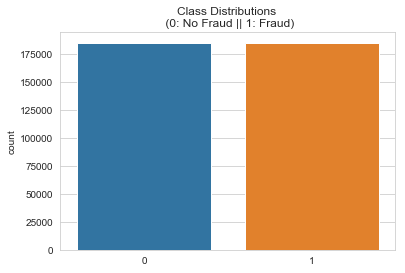

Numner of Training Data Points: 369608


In [54]:
sns.countplot(x=y_resampled_bs)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled_bs)))

In [55]:
knn.fit(X_resampled_bs, y_resampled_bs)
pred_knn = knn.predict(x_test)

In [56]:
printConfusionMatrix(y_test, pred_knn)

True Negatives: 99469
False Positives: 42
False Negatives: 28
True Positives: 144
Precision: 0.7741935483870968
Recall: 0.8372093023255814
F1-Score: 0.8044692737430169


Border line SMOTE has drastically decreased our FP as compared to ADASYN but it has increased the FN datapoints by 5 which is not desirable for us.

#### Border-line SMOTE with Tomek Links

In [65]:
X_resampled_bs_tomek, y_resampled_bs_tomek = tl.fit_resample(X_resampled_bs, y_resampled_bs)

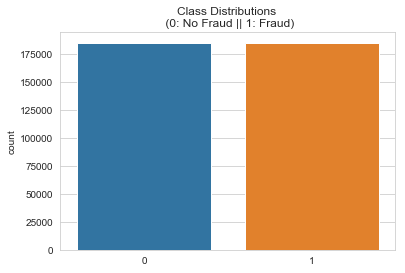

Numner of Training Data Points: 369594


In [66]:
sns.countplot(x=y_resampled_bs_tomek)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()
print('Numner of Training Data Points: {}'.format(len(X_resampled_bs_tomek)))

Tomek Links have removed 14 data points

In [67]:
knn.fit(X_resampled_bs_tomek, y_resampled_bs_tomek)
pred_knn = knn.predict(x_test)

In [68]:
printConfusionMatrix(y_test, pred_knn)

True Negatives: 99469
False Positives: 42
False Negatives: 28
True Positives: 144
Precision: 0.7741935483870968
Recall: 0.8372093023255814
F1-Score: 0.8044692737430169


No improvement with Tomek Link